In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, roc_curve, auc
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
start_time = pd.datetime.now()

In [2]:
df = pd.read_csv('df34var.csv', index_col=0)

In [3]:
df.head()

,record,date,address-zip5-homephone//days_since,address-zip5-homephone//prev_d14_count,address-zip5-homephone//prev_d30_count,address-zip5-homephone//prev_d7_count,address-zip5//days_since,address-zip5//prev_d0_count,address-zip5//prev_d14_count,address-zip5//prev_d1_d14_avg,...,ssn-name-dob//prev_d3_count,ssn-name//days_since,ssn-name//prev_d14_count,ssn-name//prev_d30_count,ssn//days_since,ssn//prev_d14_count,ssn//prev_d1_d30_avg,ssn//prev_d3_count,ssn//prev_d7_count,fraud_label
0,1,2016-01-01,0.0,1,1,1,0.0,1,1,14.0,...,1,0.0,1,1,0.0,1,30.0,1,1,0
1,2,2016-01-01,0.0,1,1,1,0.0,1,1,14.0,...,1,0.0,1,1,0.0,1,30.0,1,1,1
2,3,2016-01-01,0.0,1,1,1,0.0,1,1,14.0,...,1,0.0,1,1,0.0,1,30.0,1,1,0
3,4,2016-01-01,0.0,1,1,1,0.0,1,1,14.0,...,1,0.0,1,1,0.0,1,30.0,1,1,0
4,5,2016-01-01,0.0,1,1,1,0.0,1,1,14.0,...,1,0.0,1,1,0.0,1,30.0,1,1,0


### Z scale

In [4]:
scaler = StandardScaler()

In [5]:
col = df.columns

In [6]:
col = col[2:-1]

In [7]:
col

Index(['address-zip5-homephone//days_since',
       'address-zip5-homephone//prev_d14_count',
       'address-zip5-homephone//prev_d30_count',
       'address-zip5-homephone//prev_d7_count', 'address-zip5//days_since',
       'address-zip5//prev_d0_count', 'address-zip5//prev_d14_count',
       'address-zip5//prev_d1_d14_avg', 'address-zip5//prev_d1_d30_avg',
       'address-zip5//prev_d1_d7_avg', 'address-zip5//prev_d30_count',
       'address-zip5//prev_d3_count', 'address-zip5//prev_d7_count',
       'address//days_since', 'homephone//prev_d1_count',
       'homephone//prev_d7_count', 'name-dob//days_since',
       'name-dob//prev_d30_count', 'ssn-dob//days_since',
       'ssn-dob//prev_d30_count', 'ssn-firstname//prev_d30_count',
       'ssn-firstname//prev_d7_count', 'ssn-lastname//prev_d14_count',
       'ssn-lastname//prev_d30_count', 'ssn-name-dob//days_since',
       'ssn-name-dob//prev_d3_count', 'ssn-name//days_since',
       'ssn-name//prev_d14_count', 'ssn-name//prev_d30_c

In [8]:
df_zscaled = pd.DataFrame(scaler.fit_transform(df[col]), columns = col)

In [9]:
df_zscaled.head().describe()

,address-zip5-homephone//days_since,address-zip5-homephone//prev_d14_count,address-zip5-homephone//prev_d30_count,address-zip5-homephone//prev_d7_count,address-zip5//days_since,address-zip5//prev_d0_count,address-zip5//prev_d14_count,address-zip5//prev_d1_d14_avg,address-zip5//prev_d1_d30_avg,address-zip5//prev_d1_d7_avg,...,ssn-name-dob//days_since,ssn-name-dob//prev_d3_count,ssn-name//days_since,ssn-name//prev_d14_count,ssn-name//prev_d30_count,ssn//days_since,ssn//prev_d14_count,ssn//prev_d1_d30_avg,ssn//prev_d3_count,ssn//prev_d7_count
count,5.000000,5.000000,5.000000,5.000000e+00,5.00000,5.000000,5.000000,5.000000e+00,5.000000,5.00000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000
mean,-1.566892,-0.070089,-0.094955,-5.726295e-02,-1.54593,-0.041351,-0.079045,1.238613e-01,0.174181,0.09144,...,-1.573711,-0.046327,-1.559231,-0.070962,-0.097773,-1.556639,-0.072421,0.16845,-0.047591,-0.058092
std,0.000000,0.000000,0.000000,7.757919e-18,0.00000,0.000000,0.000000,1.551584e-17,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
min,-1.566892,-0.070089,-0.094955,-5.726295e-02,-1.54593,-0.041351,-0.079045,1.238613e-01,0.174181,0.09144,...,-1.573711,-0.046327,-1.559231,-0.070962,-0.097773,-1.556639,-0.072421,0.16845,-0.047591,-0.058092
25%,-1.566892,-0.070089,-0.094955,-5.726295e-02,-1.54593,-0.041351,-0.079045,1.238613e-01,0.174181,0.09144,...,-1.573711,-0.046327,-1.559231,-0.070962,-0.097773,-1.556639,-0.072421,0.16845,-0.047591,-0.058092
50%,-1.566892,-0.070089,-0.094955,-5.726295e-02,-1.54593,-0.041351,-0.079045,1.238613e-01,0.174181,0.09144,...,-1.573711,-0.046327,-1.559231,-0.070962,-0.097773,-1.556639,-0.072421,0.16845,-0.047591,-0.058092
75%,-1.566892,-0.070089,-0.094955,-5.726295e-02,-1.54593,-0.041351,-0.079045,1.238613e-01,0.174181,0.09144,...,-1.573711,-0.046327,-1.559231,-0.070962,-0.097773,-1.556639,-0.072421,0.16845,-0.047591,-0.058092
max,-1.566892,-0.070089,-0.094955,-5.726295e-02,-1.54593,-0.041351,-0.079045,1.238613e-01,0.174181,0.09144,...,-1.573711,-0.046327,-1.559231,-0.070962,-0.097773,-1.556639,-0.072421,0.16845,-0.047591,-0.058092


In [10]:
df_zscaled['record'] = df['record']

In [11]:
df_zscaled['date'] = df['date']

In [12]:
df_zscaled['fraud_label'] = df['fraud_label']

In [13]:
df_zscaled.head()

,address-zip5-homephone//days_since,address-zip5-homephone//prev_d14_count,address-zip5-homephone//prev_d30_count,address-zip5-homephone//prev_d7_count,address-zip5//days_since,address-zip5//prev_d0_count,address-zip5//prev_d14_count,address-zip5//prev_d1_d14_avg,address-zip5//prev_d1_d30_avg,address-zip5//prev_d1_d7_avg,...,ssn-name//prev_d14_count,ssn-name//prev_d30_count,ssn//days_since,ssn//prev_d14_count,ssn//prev_d1_d30_avg,ssn//prev_d3_count,ssn//prev_d7_count,record,date,fraud_label
0,-1.566892,-0.070089,-0.094955,-0.057263,-1.54593,-0.041351,-0.079045,0.123861,0.174181,0.09144,...,-0.070962,-0.097773,-1.556639,-0.072421,0.16845,-0.047591,-0.058092,1,2016-01-01,0
1,-1.566892,-0.070089,-0.094955,-0.057263,-1.54593,-0.041351,-0.079045,0.123861,0.174181,0.09144,...,-0.070962,-0.097773,-1.556639,-0.072421,0.16845,-0.047591,-0.058092,2,2016-01-01,1
2,-1.566892,-0.070089,-0.094955,-0.057263,-1.54593,-0.041351,-0.079045,0.123861,0.174181,0.09144,...,-0.070962,-0.097773,-1.556639,-0.072421,0.16845,-0.047591,-0.058092,3,2016-01-01,0
3,-1.566892,-0.070089,-0.094955,-0.057263,-1.54593,-0.041351,-0.079045,0.123861,0.174181,0.09144,...,-0.070962,-0.097773,-1.556639,-0.072421,0.16845,-0.047591,-0.058092,4,2016-01-01,0
4,-1.566892,-0.070089,-0.094955,-0.057263,-1.54593,-0.041351,-0.079045,0.123861,0.174181,0.09144,...,-0.070962,-0.097773,-1.556639,-0.072421,0.16845,-0.047591,-0.058092,5,2016-01-01,0


In [14]:
df = df_zscaled.copy()

### Train/Test/OOT Split

In [15]:
tt = df[(df.date > '2016-01-14') & (df.date < '2016-11-01')].copy()

In [16]:
tt.fraud_label.value_counts()

0    783510
1     11486
Name: fraud_label, dtype: int64

In [17]:
tt.head()

,address-zip5-homephone//days_since,address-zip5-homephone//prev_d14_count,address-zip5-homephone//prev_d30_count,address-zip5-homephone//prev_d7_count,address-zip5//days_since,address-zip5//prev_d0_count,address-zip5//prev_d14_count,address-zip5//prev_d1_d14_avg,address-zip5//prev_d1_d30_avg,address-zip5//prev_d1_d7_avg,...,ssn-name//prev_d14_count,ssn-name//prev_d30_count,ssn//days_since,ssn//prev_d14_count,ssn//prev_d1_d30_avg,ssn//prev_d3_count,ssn//prev_d7_count,record,date,fraud_label
38511,-1.433982,-0.070089,-0.094955,-0.057263,-1.41291,-0.041351,-0.079045,0.123861,0.174181,0.09144,...,-0.070962,-0.097773,-1.423514,-0.072421,0.16845,-0.047591,-0.058092,38512,2016-01-15,0
38512,-1.433982,-0.070089,-0.094955,-0.057263,-1.41291,-0.041351,-0.079045,0.123861,0.174181,0.09144,...,-0.070962,-0.097773,-1.423514,-0.072421,0.16845,-0.047591,-0.058092,38513,2016-01-15,0
38513,-1.433982,-0.070089,-0.094955,-0.057263,-1.41291,-0.041351,-0.079045,0.123861,0.174181,0.09144,...,-0.070962,-0.097773,-1.423514,-0.072421,0.16845,-0.047591,-0.058092,38514,2016-01-15,0
38514,-1.433982,-0.070089,-0.094955,-0.057263,-1.41291,-0.041351,-0.079045,0.123861,0.174181,0.09144,...,-0.070962,-0.097773,-1.423514,-0.072421,0.16845,-0.047591,-0.058092,38515,2016-01-15,0
38515,-1.433982,-0.070089,-0.094955,-0.057263,-1.41291,-0.041351,-0.079045,0.123861,0.174181,0.09144,...,-0.070962,-0.097773,-1.423514,-0.072421,0.16845,-0.047591,-0.058092,38516,2016-01-15,0


In [18]:
oot = df[df.date>='2016-11-01'].copy()

In [19]:
X, y = tt.iloc[:, :-3].values, tt.iloc[:, -1].values

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify = y)

### Upsample minority class

In [21]:
df_resample = pd.DataFrame(X_train, columns = [i for i in tt.columns if i not in ['record', 'date', 'fraud_label']])

In [22]:
df_resample['fraud_label'] = y_train

In [23]:
df_resample.fraud_label.value_counts()

0    587632
1      8615
Name: fraud_label, dtype: int64

In [24]:
#separate majority and minority 
df_majority = df_resample[df_resample.fraud_label==0]
df_minority = df_resample[df_resample.fraud_label==1]

In [25]:
#upsample minority
df_minority_upsampled = resample(df_minority, 
                                replace=True,
                                n_samples = int(df_majority.fraud_label.count()),
                                random_state = 123)

In [26]:
#combine
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
df_upsampled.fraud_label.value_counts()

1    587632
0    587632
Name: fraud_label, dtype: int64

In [27]:
X_train_upsampled = df_upsampled.iloc[:, :-1].values
y_train_upsampled = df_upsampled.iloc[:, -1].values

In [28]:
OOT_X = oot.iloc[:,:-3].values
OOT_y = oot.iloc[:,-1].values

### Model evaluation

In [29]:
#defining evaluation metric - FDR 3%
def scoring(model, top_percent = 3):
    train_pred = model.predict_proba(X_train)[:, 1]
    train_actual_predict = pd.DataFrame({'pred': train_pred, 'actual': y_train})
    fdr_train = (train_actual_predict.sort_values('pred', ascending=False) > 0.5).head(int(round(len(train_actual_predict) * 0.01 * top_percent)))['actual'].sum() / y_train.sum()
    
    test_pred = model.predict_proba(X_test)[:, 1]
    test_actual_predict = pd.DataFrame({'pred': test_pred, 'actual': y_test})
    fdr_test = (test_actual_predict.sort_values('pred', ascending=False) > 0.5).head(int(round(len(test_actual_predict) * 0.01 * top_percent)))['actual'].sum() / y_test.sum()
    
    oot_pred = model.predict_proba(OOT_X)[:, 1]
    oot_actual_predict = pd.DataFrame({'pred': oot_pred, 'actual': OOT_y}) 
    fdr_oot = (oot_actual_predict.sort_values('pred', ascending=False) > 0.5).head(int(round(len(oot_actual_predict) * 0.01 * top_percent)))['actual'].sum() / OOT_y.sum()
    
    scoring_df = {'Name': type(model).__name__, 'Training FDR': round(fdr_train, 4), 'Test FDR': round(fdr_test, 4), 'OOT_FDR': round(fdr_oot, 4)}
    
    return scoring_df

## Logistic model
- 34 variables

In [30]:
model_log = LogisticRegression()

In [31]:
model_log.fit(X_train_upsampled, y_train_upsampled)

/Users/XinyiGuo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
logScore = scoring(model_log)
logScore

{'Name': 'LogisticRegression',
 'Training FDR': 0.5647,
 'Test FDR': 0.5594,
 'OOT_FDR': 0.5436}

In [33]:
scoreList = [logScore]

In [34]:
pred_test = model_log.predict(X_test)

In [35]:
accuracy_score(y_test, pred_test)

0.9748728295488279

In [36]:
recall_score(y_test, pred_test)

0.5576454197143852

In [37]:
pred_prob = model_log.predict_proba(X_test)

In [38]:
pred_prob

array([[0.72256017, 0.27743983],
       [0.72265888, 0.27734112],
       [0.72229215, 0.27770785],
       ...,
       [0.7210275 , 0.2789725 ],
       [0.72257427, 0.27742573],
       [0.72121141, 0.27878859]])

In [39]:
pred_prob[:,1]

array([0.27743983, 0.27734112, 0.27770785, ..., 0.2789725 , 0.27742573,
       0.27878859])

In [40]:
df_fdr = pd.DataFrame({'pred':pred_test, 'actual':y_test})

In [41]:
fdrat3 = df_fdr.sort_values(by='pred', ascending=False).head(int(round(len(df_fdr)*0.03))).actual.sum()/df_fdr.actual.sum()
print(f'FDR at 3% is {round(fdrat3,2)}.')

FDR at 3% is 0.56.


In [42]:
confusion_matrix(y_test, pred_test)

array([[192154,   3724],
       [  1270,   1601]])

## XGBoost

In [43]:
params = {'subsample': 0.8,
 'min_child_weight': 5,
 'max_depth': 5,
 'gamma': 1,
 'colsample_bytree': 0.8}
XGB = XGBClassifier(**params)
XGB.fit(X_train_upsampled, y_train_upsampled)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

In [44]:
XGBScore = scoring(XGB)
XGBScore

{'Name': 'XGBClassifier',
 'Training FDR': 0.5855,
 'Test FDR': 0.5695,
 'OOT_FDR': 0.5511}

In [45]:
scoreList.append(XGBScore)

# Decision Tree

In [46]:
model_tree = DecisionTreeClassifier(min_samples_split = 300, min_samples_leaf = 60,random_state = 1)
model_tree.fit(X_train_upsampled, y_train_upsampled)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=60, min_samples_split=300,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [47]:
DTScore = scoring(model_tree)
DTScore

{'Name': 'DecisionTreeClassifier',
 'Training FDR': 0.6144,
 'Test FDR': 0.5611,
 'OOT_FDR': 0.5356}

In [48]:
scoreList.append(DTScore)

## Adaboost

In [73]:
model_ada1 = AdaBoostClassifier(learning_rate = 0.001, random_state = 1)
model_ada1.fit(X_train_upsampled, y_train_upsampled)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
                   learning_rate=0.001, n_estimators=50, random_state=1)

In [74]:
adaScore1 = scoring(model_ada1)
adaScore1

{'Name': 'AdaBoostClassifier',
 'Training FDR': 0.3399,
 'Test FDR': 0.3368,
 'OOT_FDR': 0.3051}

In [75]:
scoreList.append(adaScore1)

## Random Forest

In [49]:
model_rf = RandomForestClassifier(n_estimators=50, max_depth = 20, max_features = 10, verbose = True)
model_rf.fit(X_train_upsampled, y_train_upsampled)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  7.1min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=True, warm_start=False)

In [50]:
RFScore = scoring(model_rf)
RFScore

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    4.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.9s finished


{'Name': 'RandomForestClassifier',
 'Training FDR': 0.6296,
 'Test FDR': 0.5381,
 'OOT_FDR': 0.4401}

In [51]:
scoreList.append(RFScore)

## Random Forest 2

In [67]:
model_rf2 = RandomForestClassifier(bootstrap = False, ccp_alpha = 0.0, class_weight = None, criterion = 'gini', 
                             max_depth = 5, max_features = 5, max_leaf_nodes = None, max_samples = None,
                             min_impurity_decrease = 0.0, min_impurity_split = None, min_samples_leaf = 2,
                             min_samples_split = 3, min_weight_fraction_leaf = 0.0, n_estimators = 100,
                             n_jobs = None, oob_score = False, random_state = None, verbose = 0, 
                             warm_start = False)

In [68]:
model_rf2.fit(X_train_upsampled, y_train_upsampled)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [70]:
RFScore2 = scoring(model_rf2)
RFScore2

{'Name': 'RandomForestClassifier',
 'Training FDR': 0.5598,
 'Test FDR': 0.5521,
 'OOT_FDR': 0.5289}

In [71]:
scoreList.append(RFScore2)

## Neural Network

In [52]:
params = {'solver': 'adam',
   'learning_rate': 'adaptive',
   'hidden_layer_sizes': (15, 20),
   'alpha': 0.0001,
   'activation': 'tanh'}
NN = MLPClassifier(**params)
NN.fit(X_train_upsampled, y_train_upsampled)

/Users/XinyiGuo/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(15, 20), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [53]:
NNScore = scoring(NN)
NNScore

{'Name': 'MLPClassifier',
 'Training FDR': 0.5854,
 'Test FDR': 0.5657,
 'OOT_FDR': 0.5457}

In [54]:
scoreList.append(NNScore)

## Neural network 2

In [79]:
NN2 = MLPClassifier(solver ='lbfgs', alpha=1e-5, hidden_layer_sizes=(15,20), random_state=1, verbose = True)
NN2.fit(X_train_upsampled, y_train_upsampled)

/Users/XinyiGuo/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(6,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)

In [89]:
NNScore2 = scoring(NN2)
NNScore2

{'Name': 'MLPClassifier',
 'Training FDR': 0.576,
 'Test FDR': 0.5698,
 'OOT_FDR': 0.5528}

In [82]:
scoreList.append(NNScore2)

In [115]:
pred_train = NN2.predict(X_train_upsampled)

In [116]:
print('Training auc score', roc_auc_score(y_train_upsampled, pred_train))

Training auc score 0.7773793802924278


In [98]:
pred_test = NN2.predict(X_test)

In [101]:
accuracy_score(y_test, pred_test)

0.9769910792003985

In [100]:
recall_score(y_test, pred_test)

0.5663531870428422

In [114]:
print('Testing auc score:', roc_auc_score(y_test, pred_test))

Testing auc score: 0.774681509846889


In [109]:
oot_pred = NN2.predict(OOT_X)

In [113]:
print('OOT auc score:', roc_auc_score(OOT_y, oot_pred))

OOT auc score: 0.7650323653912326


In [119]:
fpr,tpr,threshold = roc_curve(OOT_y, oot_pred)

In [123]:
roc_auc = auc(fpr,tpr)

<Figure size 432x288 with 0 Axes>

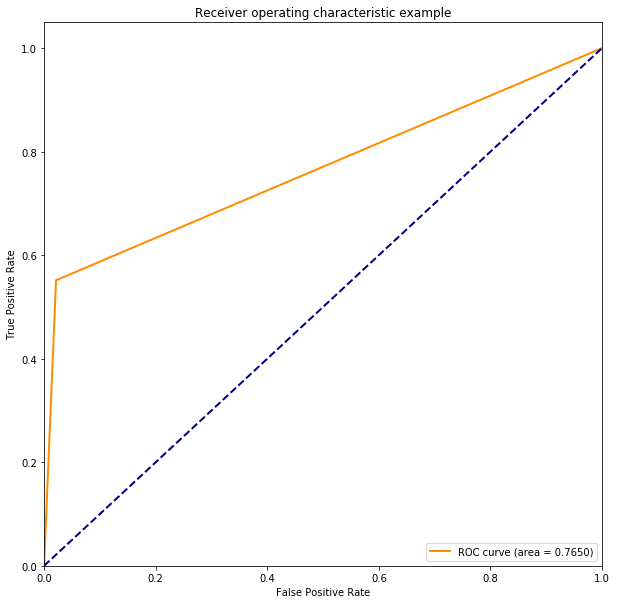

In [124]:
plt.figure()
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
lw=2, label='ROC curve (area = {0:.4f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # lw is linewidth
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Neural Network 2 with different alpha 

In [105]:
NN2_1 = MLPClassifier(solver ='lbfgs', alpha=1e-4, hidden_layer_sizes=(15,20), random_state=1, verbose = True)
NN2_1.fit(X_train_upsampled, y_train_upsampled)

/Users/XinyiGuo/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(15, 20), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)

In [106]:
NNScore2_1 = scoring(NN2_1)
NNScore2_1

{'Name': 'MLPClassifier',
 'Training FDR': 0.5808,
 'Test FDR': 0.5688,
 'OOT_FDR': 0.5482}

## Neural Network 3 

In [96]:
NN3 = MLPClassifier(solver ='lbfgs', alpha=1e-4, hidden_layer_sizes=(6,), random_state=1, verbose = True)
NN3.fit(X_train_upsampled, y_train_upsampled)

/Users/XinyiGuo/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(6,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)

In [97]:
NNScore3 = scoring(NN3)
NNScore3

{'Name': 'MLPClassifier',
 'Training FDR': 0.576,
 'Test FDR': 0.5698,
 'OOT_FDR': 0.5528}

## Neural Network 4

In [102]:
NN4 = MLPClassifier(solver ='lbfgs', alpha=1e-5, hidden_layer_sizes=(10,30), random_state=1, verbose = True)
NN4.fit(X_train_upsampled, y_train_upsampled)

/Users/XinyiGuo/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 30), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)

In [103]:
NNScore4 = scoring(NN4)
NNScore4

{'Name': 'MLPClassifier',
 'Training FDR': 0.5784,
 'Test FDR': 0.5695,
 'OOT_FDR': 0.549}

## Neural network 5

In [125]:
NN5 = MLPClassifier(solver ='lbfgs', alpha=1e-6, hidden_layer_sizes=(15,20), random_state=1, verbose = True)
NN5.fit(X_train_upsampled, y_train_upsampled)

/Users/XinyiGuo/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='relu', alpha=1e-06, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(15, 20), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)

In [126]:
NNScore2 = scoring(NN5)
NNScore2

{'Name': 'MLPClassifier',
 'Training FDR': 0.5792,
 'Test FDR': 0.5709,
 'OOT_FDR': 0.5495}

## Neural Network 6 Randomized Search

In [128]:
NN6 = MLPClassifier(random_state = 1)
parameter_space = {
    'hidden_layer_sizes': [(20, ), (25, ), (15, 20), (6,), (20,30), (10, 30), (5, 10, 5), (20,20), (30,50)],
    'activation': ['tanh', 'relu'],
    'solver': ['lbfgs', 'adam'],
    'alpha': [0.0001, 0.05, 0.01, 0.00001],
    'learning_rate': ['constant','adaptive'],
}
rand_search = RandomizedSearchCV(NN, param_distributions = parameter_space, n_iter = 100, n_jobs = 4, cv = 5, random_state = 2017, scoring = 'roc_auc') 
rand_search.fit(X_train_upsampled, y_train_upsampled) 
rand_search.cv_results_

KeyboardInterrupt: 

In [ ]:
rand_search.best_params_

In [ ]:
scoring(rand_search)

## SVM

svm = SVC(kernel='linear', C=1E10)
svm.fit(X_train_upsampled, y_train_upsampled)

scoring(svm)

### Creating model score DF

In [83]:
scoreDf = pd.DataFrame(scoreList) 

In [86]:
scoreDf=scoreDf.sort_values('OOT_FDR', ascending=False).reset_index().drop('index', axis=1)
scoreDf

,Name,Training FDR,Test FDR,OOT_FDR
0,MLPClassifier,0.5760,0.5698,0.5528
1,XGBClassifier,0.5855,0.5695,0.5511
2,MLPClassifier,0.5854,0.5657,0.5457
3,LogisticRegression,0.5647,0.5594,0.5436
4,DecisionTreeClassifier,0.6144,0.5611,0.5356
5,RandomForestClassifier,0.5598,0.5521,0.5289
6,RandomForestClassifier,0.6296,0.5381,0.4401
7,AdaBoostClassifier,0.3399,0.3368,0.3051


In [88]:
#scoreDf.to_csv('scoreDF.csv')